#  Practicum USA Externship project. The Network's Projects

# Project 1 : Analyze The Network's community

### Prepared by Yanina Khitrova

* LinkedIn: https://www.linkedin.com/in/yanina-khitrova/

***This project is the first part of a series of 2 projects prepared for the Startups Network. In this part, I analyzed The Network's community (network) and memberships. This network consists of more than a thousand entrepreneurs from different startups around the world.***

**Data Description:** 
The dataset contains 1151 records collected between 2020-09-10 and 2022-10-25: members names, locations, email addresses, network roles, categories, bios, joined and last active dates, activities, preferences, and other information. 

**Project Steps:**
The project includes the several steps: 
1. Data loading, cleaning, and preprocessing
2. Data analysis and visualization
3. Dashboard design and creation
4. Drawing the conclusions and suggestions

**Skills:** data cleaning, data analysis, descriptive statistics, data visualization, dashboard creation.

**Technology:** Python, Pandas, Numpy, Sidetable, Seaborn, Plotly, Matplotlib, Pycountry, WordCloud, Tableau.

**Results:** 
* Members profile: geography and details, trends over time, membership types, behavior
* Interactive Tableau Dashboard
* Conclusions and recommendations

## Table of Content

1. [Project Goals](#goals)
2. [Import Libraries](#libraries)
3. [Load and Explore the Data](#data_load)
4. [Data Preprocessing](#preprocessing)
5. [Data Analysis and Visualization of Findings](#eda)
6. [Conclusions](#conclusions)
7. [Suggestions](#suggestions)
8. [Link to Dashboard](#dashboard)

# **Project Goals**<a id='goals'></a>

1. Members geography
2. Membership trend over time
2. Membership profiles

## Import Libraries<a id='libraries'></a>

In [1]:
import pandas as pd 

# change number of columns and rows to display all columns and rows
pd.set_option('display.max_columns', None) # to display all columns in wide tables
pd.set_option('display.max_rows', None) # to display all rows in long tables

from operator import attrgetter

# change columns width to display full data in columns
pd.set_option('display.max_colwidth', None)

import numpy as np 

#!pip install sidetable
import sidetable

# import visualization libraries
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import plotly.graph_objects as go
import seaborn as sns

# to remove unnecessary wornings
import warnings
warnings.filterwarnings('ignore')

# to convert country code to full country name
#!pip install pycountry
import pycountry

# to visualize text
from wordcloud import WordCloud, STOPWORDS

## Load and Explore the Data<a id='data_load'></a>

The data is stored in Excel file containing 2 sheets.

In [2]:
# open excel file sheet 'Members'

network= pd.read_excel('Network_October_26_2022.xlsx', 
                       sheet_name='Members')

In [3]:
network.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1151 entries, 0 to 1150
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Member ID                       1151 non-null   int64         
 1   First Name                      1151 non-null   object        
 2   Last Name                       1149 non-null   object        
 3   Email Address                   1150 non-null   object        
 4   Opted out of commercial emails  1 non-null      object        
 5   Network Role                    1151 non-null   object        
 6   City                            1067 non-null   object        
 7   State                           1068 non-null   object        
 8   Country                         1119 non-null   object        
 9   Time Zone                       1148 non-null   object        
 10  Full Location                   1125 non-null   object        
 11  Memb

In [4]:
network.shape

(1151, 33)

In [5]:
network['Member ID'].nunique()

1151

In [6]:
print(
    'Members joined network between', network['Join Date'].min(), ' and ', network['Join Date'].max())
print(
    'Members last network visit was between', network['Last Visited Network'].min(), 
    ' and ', network['Last Visited Network'].max())

Members joined network between 2020-09-10 13:15:18.885000  and  2022-10-25 16:19:01.733000
Members last network visit was between 2020-10-23 19:00:11.672000  and  2022-10-26 16:47:02.852000


Data contains information about 1151 members who joined network between 2020-09-10 and 2022-10-25.

In [7]:
# open excel file sheet 'Profile Question Answers'

profile_questions = pd.read_excel('Network_October_26_2022.xlsx', 
                                  sheet_name='Profile Question Answers')

Excel file also contains the second page with members information: names, emails, date requested, status and 1 questions and answers.

In [8]:
profile_questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   First Name      41 non-null     object        
 1   Last Name       41 non-null     object        
 2   Email           41 non-null     object        
 3   Date Requested  41 non-null     datetime64[ns]
 4   Status          41 non-null     object        
 5   Question 1      41 non-null     object        
 6   Answer 1        41 non-null     object        
 7   Question 2      0 non-null      float64       
 8   Answer 2        0 non-null      float64       
 9   Question 3      0 non-null      float64       
 10  Answer 3        0 non-null      float64       
 11  Question 4      0 non-null      float64       
 12  Answer 4        0 non-null      float64       
 13  Question 5      0 non-null      float64       
 14  Answer 5        0 non-null      float64       
dtypes: datet

In [9]:
profile_questions.shape

(41, 15)

There are 42 members in this data with names, emails, date requested, status and 1 answer and 1 question. I would like to drop columns with answers-questions 2 - 5 because these columns are empty.

In [10]:
profile_questions = profile_questions.drop(columns=['Question 2', 'Answer 2', 
                                                    'Question 3', 'Answer 3',
                                                    'Question 4', 'Answer 4',
                                                    'Question 5', 'Answer 5'])

## Data Preprocessing<a id='preprocessing'></a>

### Correct columns names 

In [11]:
network.columns

Index(['Member ID', 'First Name', 'Last Name', 'Email Address',
       'Opted out of commercial emails', 'Network Role', 'City', 'State',
       'Country', 'Time Zone', 'Full Location', 'Member Category',
       'One-time Purchase Plans', 'Active Subscription Plans', 'Short Bio',
       'Join Date', 'Last Visited Network', 'Signed In with Facebook',
       'Signed In with LinkedIn', 'Signed In with Apple',
       'Signed In with Password', 'Has iOS App', 'Has Android App',
       'Welcome Checklist Completed', 'Followed Topics', 'Group Memberships',
       'Program Memberships', 'Ambassador Level', 'Members Referred',
       'Referrer Email', 'Referrer Name', 'Referrer ID', 'Avatar URL'],
      dtype='object')

In [12]:
profile_questions.columns

Index(['First Name', 'Last Name', 'Email', 'Date Requested', 'Status',
       'Question 1', 'Answer 1'],
      dtype='object')

In [13]:
# rename pandas columns to lower case
network.columns= network.columns.str.lower()

profile_questions.columns = profile_questions.columns.str.lower()

In [14]:
# replace spaces with underscore in columns name
network.columns = network.columns.str.replace(' ','_')

profile_questions.columns = profile_questions.columns.str.replace(' ','_')

### Drop unneeded data columns

I will not use 'Avatar URL', 'opted_out_of_commercial_emails', 'time_zone' columns for analysis, so I will drop that column. 

In [15]:
network = network.drop(columns=['avatar_url', 'opted_out_of_commercial_emails', 'time_zone'])

### Anonymize Data

The data contains personal information of the members. So I would like to drop the columns with the personal information.

In [16]:
network = network.drop(columns=['first_name', 'last_name', 'email_address', 'referrer_email', 'referrer_name'])

In [17]:
network = network.replace({'network_name': 'The Network'})

In [18]:
profile_questions = profile_questions.drop(columns=['first_name', 'last_name', 'email'])

### Missing Values

Check for missing values using side table library. This libraty shows number of missing values and its persentage of total.

In [19]:
network.stb.missing()

missing  total    percent
one-time_purchase_plans         1148   1151  99.739357
active_subscription_plans       1142   1151  99.218071
ambassador_level                1138   1151  98.870547
followed_topics                 1082   1151  94.005213
program_memberships             1020   1151  88.618593
group_memberships                975   1151  84.708949
short_bio                        974   1151  84.622068
member_category                  923   1151  80.191138
referrer_id                      644   1151  55.951347
city                              84   1151   7.298002
state                             83   1151   7.211121
country                           32   1151   2.780191
full_location                     26   1151   2.258905
last_visited_network               6   1151   0.521286
has_android_app                    0   1151   0.000000
members_referred                   0   1151   0.000000
welcome_checklist_completed        0   1151   0.000000
member_id                          0   1151   0.000000
has_ios_app                        0   1151   0.000000
signed_in_with_password            0   1151   0.000000
signed_in_with_apple               0   1151   0.000000
signed_in_with_linkedin            0   1151   0.000000
network_role                       0   1151   0.000000
join_date                          0   1151   0.000000
signed_in_with_facebook            0   1151   0.000000

About half of all column have significunt number of missing values. I would like to check missing values column by column.

#### Column 'Last Visited Network' 

Several users have joined date but don't have last visited date.

In [20]:
network[network['last_visited_network'].isnull()]

member_id network_role           city state country      full_location  \
1121   12423973  contributor            NaN    WA     USA           King, WA   
1127   12545285  contributor         Corona    CA     USA         Corona, CA   
1131   12907848  contributor    Westborough    MA     USA    Westborough, MA   
1132   12919880  contributor       Rockland    MA     USA       Rockland, MA   
1137   12999548  contributor        Tallinn   NaN     EST   Tallinn, Estonia   
1141   13115057  contributor  San Francisco    CA     USA  San Francisco, CA   

     member_category one-time_purchase_plans active_subscription_plans  \
1121             NaN                     NaN                       NaN   
1127             NaN                     NaN                       NaN   
1131             NaN                     NaN                       NaN   
1132             NaN                     NaN                       NaN   
1137             NaN                     NaN                       NaN   
1141             NaN                     NaN                       NaN   

     short_bio               join_date last_visited_network  \
1121       NaN 2022-08-18 19:49:37.711                  NaT   
1127       NaN 2022-08-26 17:10:00.865                  NaT   
1131       NaN 2022-09-21 20:54:28.100                  NaT   
1132       NaN 2022-09-22 16:12:48.783                  NaT   
1137       NaN 2022-09-28 15:37:10.373                  NaT   
1141       NaN 2022-10-06 00:29:52.412                  NaT   

      signed_in_with_facebook  signed_in_with_linkedin  signed_in_with_apple  \
1121                    False                    False                 False   
1127                    False                    False                 False   
1131                    False                    False                 False   
1132                    False                    False                 False   
1137                    False                    False                 False   
1141                    False                    False                 False   

      signed_in_with_password  has_ios_app  has_android_app  \
1121                     True        False            False   
1127                    False        False            False   
1131                     True        False            False   
1132                     True        False            False   
1137                     True        False            False   
1141                     True        False            False   

      welcome_checklist_completed followed_topics group_memberships  \
1121                        False             NaN               NaN   
1127                        False             NaN               NaN   
1131                        False             NaN               NaN   
1132                        False             NaN               NaN   
1137                        False             NaN               NaN   
1141                        False             NaN               NaN   

     program_memberships ambassador_level  members_referred  referrer_id  
1121                 NaN              NaN                 0          NaN  
1127                 NaN              NaN                 0          NaN  
1131                 NaN              NaN                 0          NaN  
1132                 NaN              NaN                 0          NaN  
1137                 NaN              NaN                 0          NaN  
1141                 NaN              NaN                 0          NaN

In [21]:
network['last_visited_network'] = network['last_visited_network'].fillna(network['join_date'])

Looks like these users joined but never visited website again. I replaced NaN values with join date.

#### Columns 'city', 'state', 'country', and 'full_location'

Column 'Full Location" is the most full from all address columns, so I will start from this column.

In [22]:
network[network['full_location'].isnull()].shape[0]

26

The data shows that 26 members didn't specify their location. There is no way to replace that information. So I will fill NAs in column where 'Full Location' were not provided with 'Not provided'.

In [23]:
network['full_location'] = network['full_location'].fillna('Not provided')

In [24]:
network[network['country'].isnull()].shape[0]

32

32 members have full address but miss city, state and country.

In [25]:
network[(network['country'].isnull()) & (network['full_location']!='Not provided')]

member_id network_role city state country           full_location  \
210     5994567  contributor  NaN   NaN     NaN                Cary, NC   
671     8194341  contributor  NaN   NaN     NaN             Killeen, TX   
770     8674732  contributor  NaN   NaN     NaN           Baltimore, MD   
1037   10614749  contributor  NaN   NaN     NaN  London, United Kingdom   
1078   11254699  contributor  NaN   NaN     NaN              Boston, MA   
1111   12201185  contributor  NaN   NaN     NaN           Charlotte, NC   

     member_category one-time_purchase_plans active_subscription_plans  \
210              NaN                     NaN                       NaN   
671              NaN                     NaN                       NaN   
770              NaN                     NaN                       NaN   
1037             NaN                     NaN                       NaN   
1078             NaN                     NaN                       NaN   
1111             NaN                     NaN                       NaN   

     short_bio               join_date    last_visited_network  \
210        NaN 2021-01-11 17:31:45.220 2021-02-12 22:44:12.489   
671        NaN 2021-08-04 13:07:45.742 2021-09-03 15:38:50.024   
770        NaN 2021-09-22 14:08:16.436 2022-03-24 17:45:50.031   
1037       NaN 2022-03-18 22:29:08.527 2022-05-31 20:21:01.749   
1078       NaN 2022-05-14 00:48:25.494 2022-10-23 12:39:51.911   
1111       NaN 2022-07-31 17:05:53.665 2022-10-07 14:20:14.843   

      signed_in_with_facebook  signed_in_with_linkedin  signed_in_with_apple  \
210                     False                     True                 False   
671                     False                    False                 False   
770                     False                    False                 False   
1037                    False                    False                 False   
1078                    False                    False                 False   
1111                    False                    False                 False   

      signed_in_with_password  has_ios_app  has_android_app  \
210                     False         True            False   
671                      True         True            False   
770                     False         True            False   
1037                     True        False            False   
1078                    False         True            False   
1111                     True        False            False   

      welcome_checklist_completed followed_topics  \
210                         False             NaN   
671                         False             NaN   
770                         False             NaN   
1037                        False             NaN   
1078                        False             NaN   
1111                        False             NaN   

                          group_memberships  \
210                                     NaN   
671                                     NaN   
770   Prepare 4 VC Social Audio, The Bridge   
1037                                    NaN   
1078                                    NaN   
1111                                    NaN   

                           program_memberships ambassador_level  \
210                                        NaN              NaN   
671                                        NaN              NaN   
770                                        NaN           Bronze   
1037                                       NaN              NaN   
1078  Skills + Tools presented by Prepare 4 VC              NaN   
1111                                       NaN              NaN   

      members_referred  referrer_id  
210                  0          NaN  
671                  0    7858389.0  
770                  2          NaN  
1037                 0          NaN  
1078                 0          NaN  
1111                 0    4829869.0

All thise customers are from USA exept of one - from United Kingdom. I add country name for this customer manually.

In [26]:
network.loc[network['member_id'] == 10614749, 'country'] = 'GBR'

In [27]:
network.loc[(network['country'].isnull()) & (network['full_location']!='Not provided'), 'country'] = 'USA'

I planned to fill missed countries with information from the time zones, but found that some timesones can be same for different countries. So I just fill missing values with 'Not provided'.

In [28]:
network['country'] = network['country'].fillna('Not provided')

In [29]:
# substitute country code to country name

#list_alpha_2 = [i.alpha_2 for i in list(pycountry.countries)]
list_alpha_3 = [i.alpha_3 for i in list(pycountry.countries)]    

def country_flag(network):
    #if (len(network['Country'])==2 and network['Country'] in list_alpha_2):
        #return pycountry.countries.get(alpha_2=network['Country']).name
    if (len(network['country'])==3 and network['country'] in list_alpha_3):
        return pycountry.countries.get(alpha_3=network['country']).name
    else:
        return 'Not provided'

network['country_name']=network.apply(country_flag, axis = 1)

In [30]:
network[network['city'].isnull()].shape[0]

84

84 customers have country and full address in USA but miss state and city names. I can restore this information from the full address column.

In [31]:
# replace city name with full location and extract city name from it (string till comma) 

network['city'] = network['full_location'].str.extract('(.+?),')

In [32]:
network[network['city'].isnull()].shape[0]

27

There are 27 customers without city name now. I will replace it with 'Not provided'

In [33]:
network['city'] = network['city'].fillna('Not provided')

There are also missing values in 'State' column. I try to restore missing states when possible.

In [34]:
network[network['state'].isnull()].shape[0]

83

Fill NAs in 'State' column with 'Not provided' for 83 customers without any location information

In [35]:
network.loc[(network['state'].isnull()) & (network['full_location']=='Not provided'), 'state'] = 'Not provided'

Now I can extract states for customers from USA from 'Full Location' column (Last 2 characters).

In [36]:
network.loc[network['country']=='USA', 'state'] = network.loc[network['country']=='USA', 'full_location'].str[-2:]

Other locations might not have states, so I will replace NAs with 'Not provided' as well

In [37]:
network['state'] = network['state'].fillna('Not provided')

####  'Referrer ID' column

In [38]:
network['referrer_id'].value_counts().head()

4829869.0    305
5057122.0    142
5686940.0      7
5079630.0      6
5228997.0      5
Name: referrer_id, dtype: int64

I will fill NAs in all these columns with 'No referrer'

In [39]:
network['referrer_id'] = network['referrer_id'].fillna('No referrer')

#### 'Member Category' column

In [40]:
network[network['member_category'].isnull()].shape[0]

923

In [41]:
network[network['member_category'].notnull()].shape[0]

228

Most of members don't have member category filled. I will fill NAs with 'Not provided'

In [42]:
network['member_category'] = network['member_category'].fillna('Not provided')

I would like to check member categories in the data.

In [43]:
network['member_category'].value_counts()

Not provided                     923
Founder                           91
Co-founder                        36
Service provider                  18
Advisor                           18
Investor                           8
Team member                        6
Cofounder                          6
Prepare 4 VC team                  5
CEO                                3
Co founder                         2
Founder CEO                        2
Founder, CEO                       1
Principal and Founder              1
Associate                          1
Partner AlphaEquity Builder        1
Founder, Chief Exec. Kernel        1
Chief Investment Officer           1
Sales Coach                        1
Investor,Founder                   1
Community Sponsor                  1
CEO @WebiNerds                     1
CEO, Founder                       1
CEO, Genii Systems                 1
Advisor Founder Investor           1
Cofounder and Coach                1
Founder & CEO                      1
C

There are list of 44 members category and some of them are repetitive but written differently. For future, I would recomment to add a category list to choose from. Now I will replace current categories with unifyed ones.

In [44]:
network.loc[network['member_category'].str.contains('founder', case=False), 'member_category'] = 'Founder/Co-founder'
network.loc[network['member_category'].str.contains('advisor', case=False), 'member_category'] = 'Advisor/Coach'
network.loc[network['member_category'].str.contains('coach', case=False), 'member_category'] = 'Advisor/Coach'
network.loc[network['member_category'].str.contains('investor', case=False), 'member_category'] = 'Investor'
network.loc[network['member_category'].str.contains('Sponsor', case=False), 'member_category'] = 'Investor'
network.loc[network['member_category'].str.contains('ceo', case=False), 'member_category'] = 'CEO/VP'
network.loc[network['member_category'].str.contains('vp', case=False), 'member_category'] = 'CEO/VP'
network.loc[network['member_category'].str.contains('chief', case=False), 'member_category'] = 'Chief officer'
network.loc[network['member_category'].str.contains('CFO', case=False), 'member_category'] = 'Chief officer'
network.loc[network['member_category'].str.contains('Associate', case=False), 'member_category'] = 'Team member/Associate'
network.loc[network['member_category'].str.contains('Team', case=False), 'member_category'] = 'Team member/Associate'

network['member_category'] = network['member_category'].replace('Neighborhood Business Manager', 'Other')
network['member_category'] = network['member_category'].replace('Architect of Ideas', 'Other')
network['member_category'] = network['member_category'].replace('Brand Innovation Consultant', 'Other')
network['member_category'] = network['member_category'].replace('Partner AlphaEquity Builder', 'Other')
network['member_category'] = network['member_category'].replace('Business Development', 'Other')

In [45]:
network['member_category'].value_counts()

Not provided             923
Founder/Co-founder       150
Advisor/Coach             22
Service provider          18
Team member/Associate     12
Investor                   9
CEO/VP                     7
Chief officer              5
Other                      5
Name: member_category, dtype: int64

In [46]:
network['member_category'].value_counts().shape[0]

9

Now there are 9 categories. List of categories are shorter and more managable.

#### 'short_bio' column

In [47]:
(network[network['short_bio'].notnull()].shape[0]/network['member_id'].nunique())*100

15.377932232841008

Only 15.4% of users provided short bio. I will fill NAs with 'Not provided'.

In [48]:
network['short_bio'] = network['short_bio'].fillna('Not provided')

#### 'group_memberships' column

In [49]:
(network[network['group_memberships'].notnull()]['member_id'].nunique()/network['member_id'].nunique())*100

15.291051259774111

Only 15% of users has Group Memberships. I will fill NAs with 'No Group Memberships'.

In [50]:
network['group_memberships'] = network['group_memberships'].fillna('No Group Memberships')

#### 'followed_topics' column

In [51]:
(network[network['followed_topics'].notnull()]['member_id'].nunique()/network['member_id'].nunique())*100

5.994787141615986

6% of users follow topics. I will fill NAs with 'Not Followed'

In [52]:
network['followed_topics'] = network['followed_topics'].fillna('Not Followed')

#### 'program_memberships' column

In [53]:
(network[network['program_memberships'].notnull()]['member_id'].nunique()/network['member_id'].nunique())*100

11.381407471763684

11% of users has Program Memberships. I will fill NAs with 'No Memberships'

In [54]:
network['program_memberships'] = network['program_memberships'].fillna('No Memberships')

#### 'ambassador_level' column

In [55]:
network['ambassador_level'].value_counts()

Bronze    11
Gold       2
Name: ambassador_level, dtype: int64

There are 13 ambassador level users. I will replace NAs with 'Not Ambassador'.

In [56]:
network['ambassador_level'] = network['ambassador_level'].fillna('Not Ambassador')

#### 'active_subscription_plans' column

In [57]:
network['active_subscription_plans'].value_counts()

Free (auto-generated) - Free                                  7
4 monthly payments (16 week program) - Monthly                1
Free (auto-generated) - Free, Free (auto-generated) - Free    1
Name: active_subscription_plans, dtype: int64

There are 9 users with Active Subscription Plans. NAs will be filled with 'No Subscription Plan'. For some reason, one user has Active Subscription Plans doubles: 'Free (auto-generated) - Free, Free (auto-generated) - Free'. I fix that.

In [58]:
network['active_subscription_plans'] = network['active_subscription_plans'].replace(
    'Free (auto-generated) - Free, Free (auto-generated) - Free', 'Free (auto-generated) - Free')

In [59]:
network['active_subscription_plans'] = network['active_subscription_plans'].fillna('No Subscription Plan')

In [60]:
network['active_subscription_plans'].value_counts()

No Subscription Plan                              1142
Free (auto-generated) - Free                         8
4 monthly payments (16 week program) - Monthly       1
Name: active_subscription_plans, dtype: int64

#### 'one-time_purchase_plans' column

In [61]:
network['one-time_purchase_plans'].value_counts()

Upfront Payment (20% discount)    3
Name: one-time_purchase_plans, dtype: int64

There are 3 users with One-time Purchase Plans. I will fill NAs in 'One-time Purchase Plans' columns with 'No One-time Purchase Plans'.

In [62]:
network['one-time_purchase_plans'] = network['one-time_purchase_plans'].fillna('No One-time Purchase Plans')

In [63]:
network.stb.missing()

missing  total  percent
member_id                          0   1151      0.0
network_role                       0   1151      0.0
referrer_id                        0   1151      0.0
members_referred                   0   1151      0.0
ambassador_level                   0   1151      0.0
program_memberships                0   1151      0.0
group_memberships                  0   1151      0.0
followed_topics                    0   1151      0.0
welcome_checklist_completed        0   1151      0.0
has_android_app                    0   1151      0.0
has_ios_app                        0   1151      0.0
signed_in_with_password            0   1151      0.0
signed_in_with_apple               0   1151      0.0
signed_in_with_linkedin            0   1151      0.0
signed_in_with_facebook            0   1151      0.0
last_visited_network               0   1151      0.0
join_date                          0   1151      0.0
short_bio                          0   1151      0.0
active_subscription_plans          0   1151      0.0
one-time_purchase_plans            0   1151      0.0
member_category                    0   1151      0.0
full_location                      0   1151      0.0
country                            0   1151      0.0
state                              0   1151      0.0
city                               0   1151      0.0
country_name                       0   1151      0.0

Now, data is clean and there are no NAs.

### Duplicated Values

Check data for duplicated rows

In [64]:
network[network.duplicated()]

Empty DataFrame
Columns: [member_id, network_role, city, state, country, full_location, member_category, one-time_purchase_plans, active_subscription_plans, short_bio, join_date, last_visited_network, signed_in_with_facebook, signed_in_with_linkedin, signed_in_with_apple, signed_in_with_password, has_ios_app, has_android_app, welcome_checklist_completed, followed_topics, group_memberships, program_memberships, ambassador_level, members_referred, referrer_id, country_name]
Index: []

There are no duplicates in the data.

### Columns 'followed_topics',	'group_memberships',	'program_memberships'

There columns have several values looking same. I would like to analyze it, so I make value each oun rows. This way I can use it in dashboard and for more deep analysis.

In [65]:
network = (network
                       .assign(followed_topics=network['followed_topics']
                               .str.split(','))
                       .explode('followed_topics')
                      )
network['followed_topics'] = network['followed_topics'].str.strip() # remove white space before and after string

In [66]:
network = (network
                       .assign(group_memberships=network['group_memberships']
                               .str.split(','))
                       .explode('group_memberships')
                      )
network['group_memberships'] = network['group_memberships'].str.strip() # remove white space before and after string

In [67]:
network = (network
                       .assign(program_memberships=network['program_memberships']
                               .str.split(','))
                       .explode('program_memberships')
                      )
network['program_memberships'] = network['program_memberships'].str.strip() # remove white space before and after string

## Data Analysis and Visualization of Findings<a id='eda'></a>

In [68]:
# function to count values of column and find the percentage of total

def value_counts_perc_pivot(data, index, column):
    data_counts_pivot = data.pivot_table(
        index=index, values=column, 
        aggfunc='nunique').sort_values(by=column, ascending=False).reset_index()
    data_counts_pivot['%_total'] = round(((data_counts_pivot[column]) / (data_counts_pivot[column].sum()))*100, 2)
    return data_counts_pivot

First, I would like to check the countries of the network members.

In [69]:
users_by_country = value_counts_perc_pivot(network, 'country', 'member_id')
print('There are', network['member_id'].nunique(), 'members from', users_by_country['country'].nunique(), 'countries.')
users_by_country.head()

There are 1151 members from 66 countries.


country  member_id  %_total
0     USA        788    68.46
1     IND         58     5.04
2     CAN         37     3.21
3     NGA         26     2.26
4     GBR         26     2.26

There are 1151 members from 66 countries. The most members are from the United States, so I would like to check number of members by states.

In [70]:
usa_by_state = value_counts_perc_pivot(network.query("country == 'USA'"), 'state', 'member_id')
usa_by_state.head()

state  member_id  %_total
0    MA        272    34.52
1    CA        102    12.94
2    NY         68     8.63
3    TX         46     5.84
4    FL         29     3.68

In [71]:
print('There are', usa_by_state.shape[0], 'states in the data.')

There are 43 states in the data.


In [72]:
print(usa_by_state['%_total'].head(3).sum(), 'of all members are from Massachusetts, California, and New York.')

56.09 of all members are from Massachusetts, California, and New York.


There are users from 43 states in the network. 56% members are from 3 states: Massachusetts, California, and New York. Most users are from Massachusetts.

To visualize the data about members locations around the world, I build the density map using the choropleth map from Plotly express library.

In [73]:
fig = px.choropleth(users_by_country,
                    locationmode='ISO-3', 
                    locations='country',
                    color='member_id',
                    labels={'member_id':'Members Number'},
                    color_continuous_scale='Deep')

fig.update_layout(title='Members Location by Country', 
                  title_font_size=32,
                  title_x=0.5) 
fig.show()

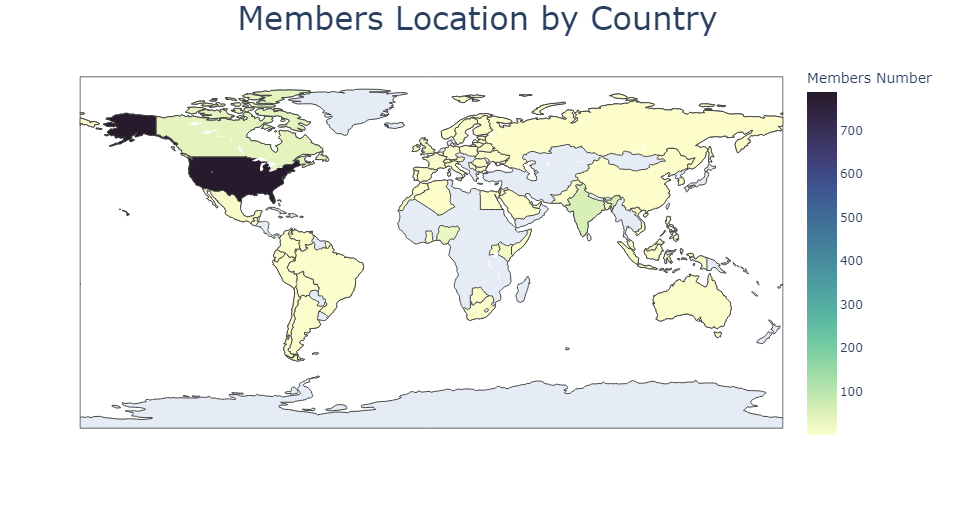

The biggest number of customers are located in the USA and India - 788 and 58 customers accordingly. 

In [74]:
fig = px.choropleth(usa_by_state,
                    locationmode='USA-states', 
                    locations='state',
                    color='member_id',
                    scope='usa',
                    color_continuous_scale='Deep'
                   )
fig.update_layout(title='Members by US States', 
                  title_font_size=32,
                 title_x=0.5)    

fig.show()

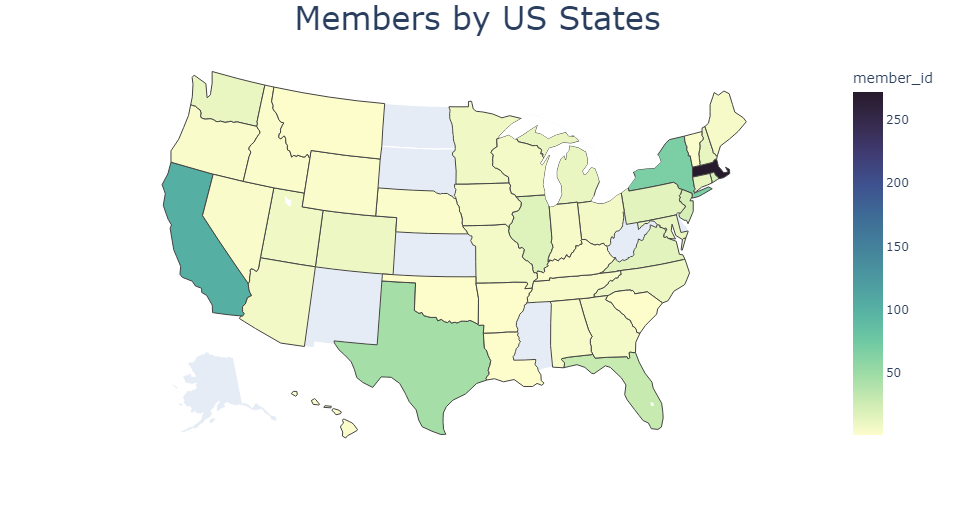

Most US customers are located in Massachusetts, California, New York and Texas.

In [75]:
fig = px.choropleth(users_by_country,
                    locationmode='ISO-3', 
                    locations='country',
                    color='member_id',
                    scope='africa',
                    color_continuous_scale='Deep'
                   )
fig.update_layout(title='Members in Africa', 
                  title_font_size=32,
                 title_x=0.5)    

fig.show()

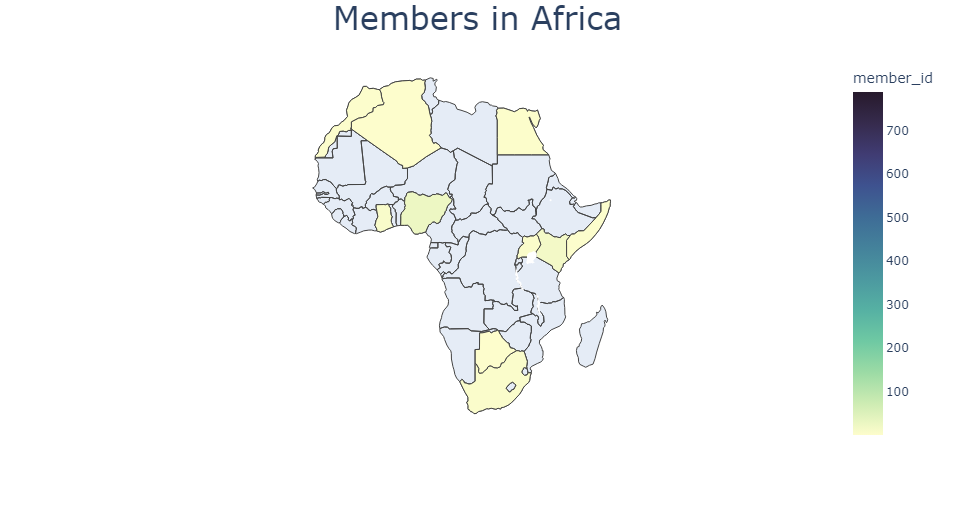

There are limited number of members located in the African countries. Most members in Africa are located in Nigeria.

In [76]:
fig = px.choropleth(users_by_country,
                    locationmode='ISO-3', 
                    locations='country',
                    color='member_id',
                    scope='asia',
                    color_continuous_scale='Deep'
                   )
fig.update_layout(title='Members in Asia', 
                  title_font_size=32,
                  title_x=0.5)    

fig.show()

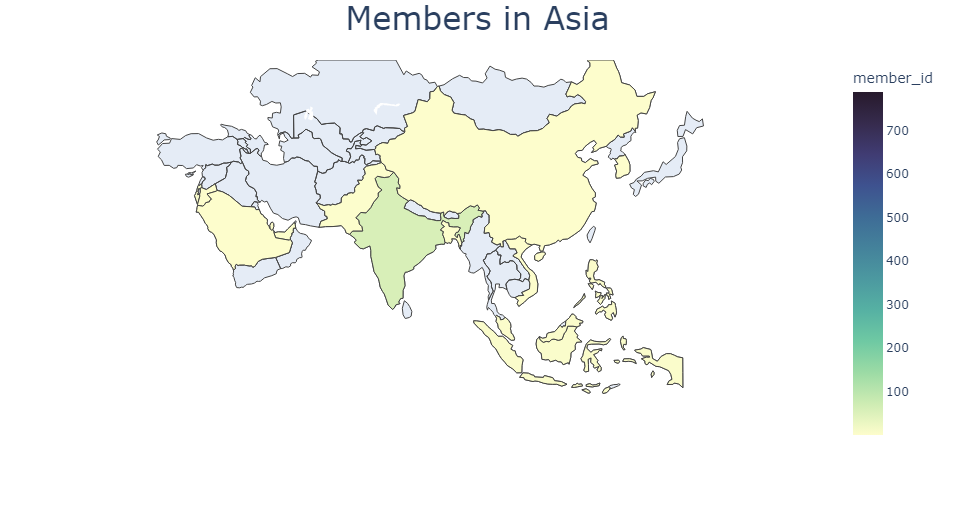

Most network users from Asia are located in India.

In [77]:
fig = px.choropleth(users_by_country,
                    locationmode='ISO-3', 
                    locations='country',
                    color='member_id',
                    scope='europe',
                    color_continuous_scale='Deep'
                   )
fig.update_layout(title='Members in Europe', 
                  title_font_size=32,
                 title_x=0.5)    

fig.show()

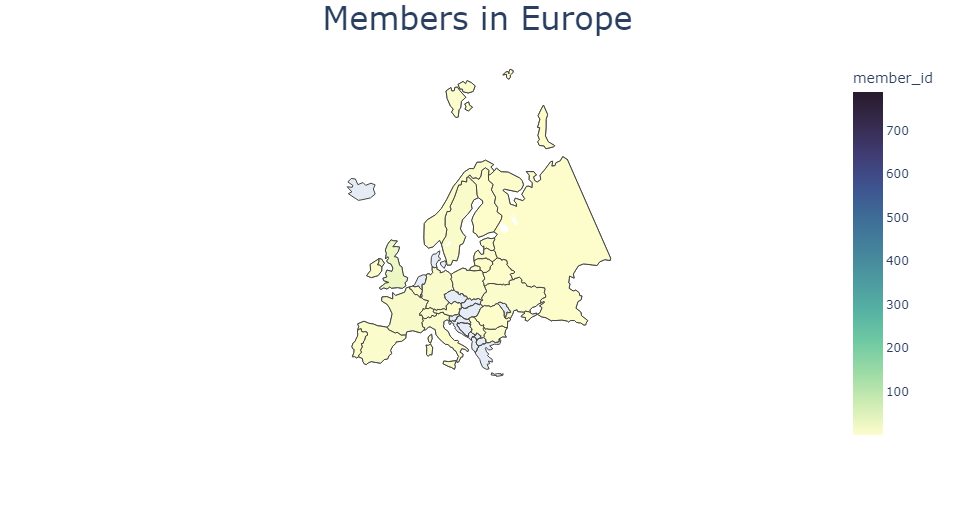

Most network users from Europe are located in United Kingdom.

In [78]:
fig = px.choropleth(users_by_country,
                    locationmode='ISO-3', 
                    locations='country',
                    color='member_id',
                    scope='north america',
                    color_continuous_scale='Deep'
                   )
fig.update_layout(title='Customers in North America', 
                  title_font_size=32,
                  title_x=0.5)    

fig.show()

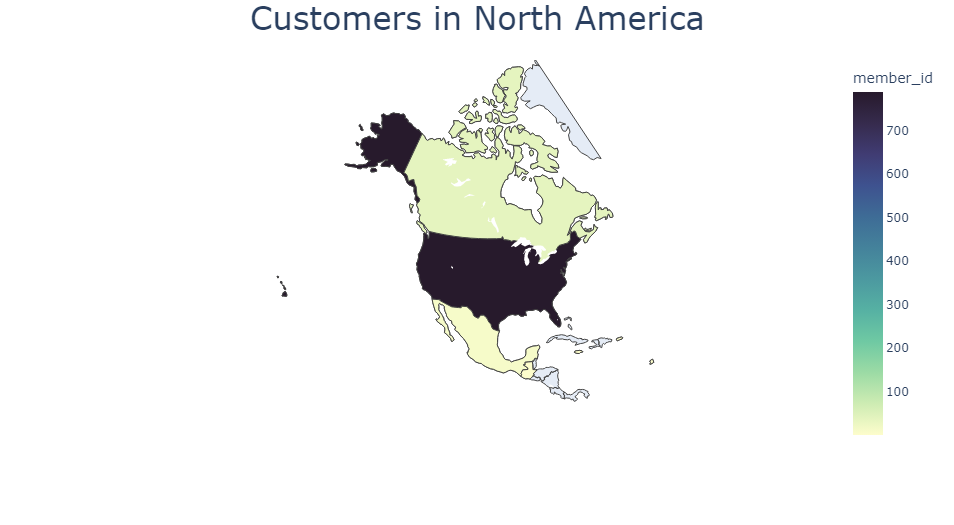

Most North American members are from United States.

In [79]:
fig = px.choropleth(users_by_country,
                    locationmode='ISO-3', 
                    locations='country',
                    color='member_id',
                    scope='south america',
                    color_continuous_scale='Deep'
                   )
fig.update_layout(title='Members in South America', 
                  title_font_size=32,
                 title_x=0.5,
                 )   
fig.show()

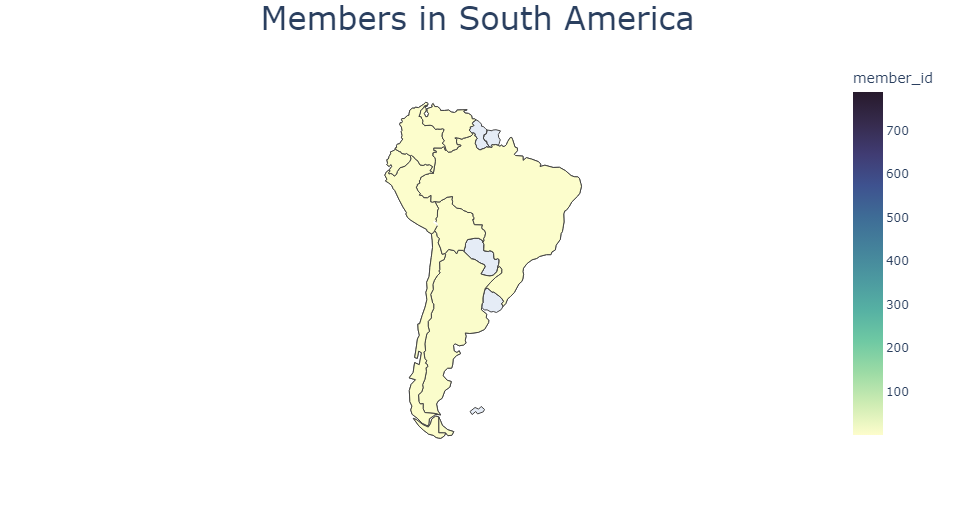

Several South American countries has from 1 to 5 members.

Next, I would like to check users preferences. First, I study what kinds of program and group memberships are most interesting for the members and which topics members followed. 

### Program Memberships

In [80]:
no_program_membership = round((network[network['program_memberships'] == 'No Memberships']['member_id'].nunique()
 /network['member_id'].nunique()),4)

print("{:.1%} of members don't have any program membership.".format(no_program_membership))


88.6% of members don't have any program membership.


In [81]:
program_memberships = network[network['program_memberships']!='No Memberships'].pivot_table(
    index=['program_memberships'], 
    values='member_id', 
    aggfunc='nunique').reset_index().sort_values(by='member_id')
program_memberships

program_memberships  member_id
3  Pitching from the Investor's Perspective          3
5       Prepare 4 VC Accelerator - Cohort 5          5
1             Cohort 2: Accelerator Program          6
0             Cohort 1: Accelerator Program          8
4       Prepare 4 VC Accelerator - Cohort 4         13
6         Prepare 4 VC Accelerator Cohort 3         13
2                Guide for Event Organizers         17
8       Startup Grind Boston fireside chats         40
9   Your Wellness presented by Prepare 4 VC         41
7  Skills + Tools presented by Prepare 4 VC         55

To visualize memberships data, I used horizontal barplot chart from Matplotlib library. 

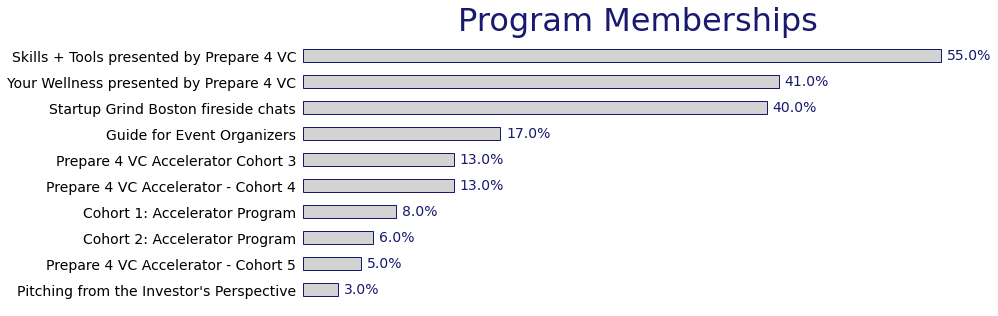

In [82]:
fig, ax = plt.subplots(figsize=(12, 5))

ax = plt.barh(program_memberships['program_memberships'], 
              program_memberships['member_id'],                                              
              color='lightgrey',
              edgecolor='midnightblue',
              height=0.5)

# Add annotation to bars
for p in ax.patches:
    width = p.get_width()    # get bar length
    plt.text(width + 0.5,       # set the text at 1 unit right of the bar
            p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
            '{:1.1f}%'.format(width), # set variable to display, 2 decimals
            ha = 'left',   # horizontal alignment
            va = 'center',
            fontsize=14, 
            color='midnightblue')     

plt.ylabel(None)
plt.title('Program Memberships', fontsize=32, color='midnightblue')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Hide the right and top spines
plt.box(False)

# Remove x ticks and labels
plt.tick_params(left = False, right = False , labelleft = True ,
                labelbottom = False, bottom = False)
plt.show()            

The most popular membership is 'Skills + Tools presented by The Network' - 55% of members who have group membership, have it.

### Group Memberships

In [83]:
# find how many members don't have group memberships

no_group_membership = round((network[network['group_memberships'] == 'No Group Memberships']['member_id'].nunique()
 /network['member_id'].nunique()),4)

print("{:.1%} of members don't have any group membership.".format(no_group_membership))

84.7% of members don't have any group membership.


In [84]:
# group data by membership to count the number of each membership
group_membership = (network.pivot_table(index='group_memberships', 
                                       values='member_id',
                                      aggfunc='nunique')
                    .reset_index()
                    .sort_values(by='member_id')
                    .query("group_memberships !='No Group Memberships'")
                   )
# add column with persentage
group_membership['%_total'] = round(
    ((group_membership['member_id']) / (group_membership['member_id'].sum()))*100, 2)
group_membership

group_membership

group_memberships  member_id  %_total
1                     Female Founders Oasis          1     0.42
9  Wellness Portal Champions - Collab Group          7     2.97
3  P4VC Champion - CrossPortal Collab Group          8     3.39
7    Skills Portal Champions - Collab Group          9     3.81
4               P4VC Top 21 of '21 Showcase         21     8.90
5           Prepare 4 VC Accelerator Alumni         23     9.75
8                                The Bridge         28    11.86
6                 Prepare 4 VC Social Audio         40    16.95
0                     Boston New Technology         99    41.95

To visualize group memberships data, I used horizontal barplot chart from Matplotlib library. 

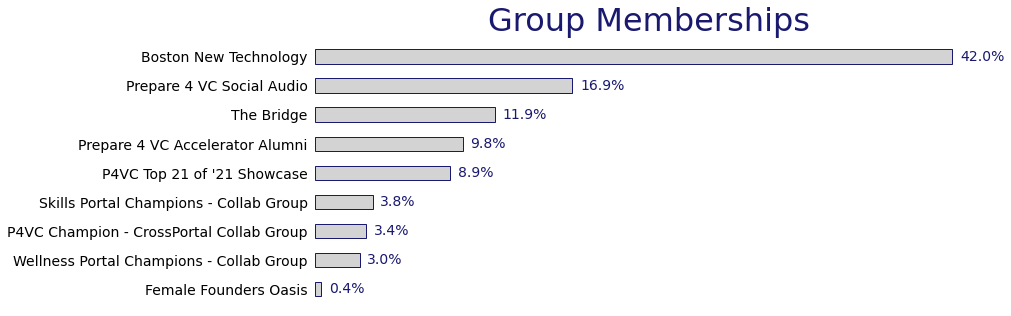

In [85]:
fig, ax = plt.subplots(figsize=(12, 5))

ax = plt.barh(group_membership['group_memberships'], 
              group_membership['%_total'],                                              
              color='lightgrey',
              edgecolor='midnightblue',
              height=0.5)

# Add annotation to bars
for p in ax.patches:
    width = p.get_width()    # get bar length
    plt.text(width + 0.5,       # set the text at 1 unit right of the bar
            p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
            '{:1.1f}%'.format(width), # set variable to display, 2 decimals
            ha = 'left',   # horizontal alignment
            va = 'center',
            fontsize=14, 
            color='midnightblue')     

plt.ylabel(None)
plt.title('Group Memberships', fontsize=32, color='midnightblue')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Hide the right and top spines
plt.box(False)

# Remove x ticks and labels
plt.tick_params(left = False, right = False , labelleft = True ,
                labelbottom = False, bottom = False)
plt.show()            

The most popular group membership is 'Boston New Technology	' - 42% of members who have group membership, have it.

### Followed Topics

In [86]:
# find how many members don't follow any topic

no_topic = round((network[network['followed_topics'] == 'Not Followed']['member_id'].nunique()
 /network['member_id'].nunique()),4)

print("{:.1%} of members don't follow any topic.".format(no_topic))


94.0% of members don't follow any topic.


In [87]:
# group data by membership to count the number of each membership
topics = (network.pivot_table(index='followed_topics', 
                                       values='member_id',
                                      aggfunc='nunique')
                    .reset_index()
                    .sort_values(by='member_id')
                    .query("followed_topics !='Not Followed'")
                   )
# add column with persentage
topics['%_total'] = round(
    ((topics['member_id']) / (topics['member_id'].sum()))*100, 2)
topics

topics

followed_topics  member_id  %_total
4                           Founder Stories          1     0.39
7                               Oasis Radio          4     1.57
11                             Startup News          5     1.97
12                            The Fun Stuff         11     4.33
14  🏝Oasis Treasure Chest: Exclusive Offers         12     4.72
1                          Community Events         16     6.30
5                           Knowledge Share         17     6.69
9                Skills & Tools @ The Oasis         19     7.48
13                Your Wellness @ The Oasis         20     7.87
2                        Community Requests         21     8.27
3                      Founder Fundamentals         29    11.42
8                                 Resources         29    11.42
0                             Announcements         31    12.20
10                           Startup Events         39    15.35

To visualize followed topics data, I used horizontal barplot chart from Matplotlib library. 

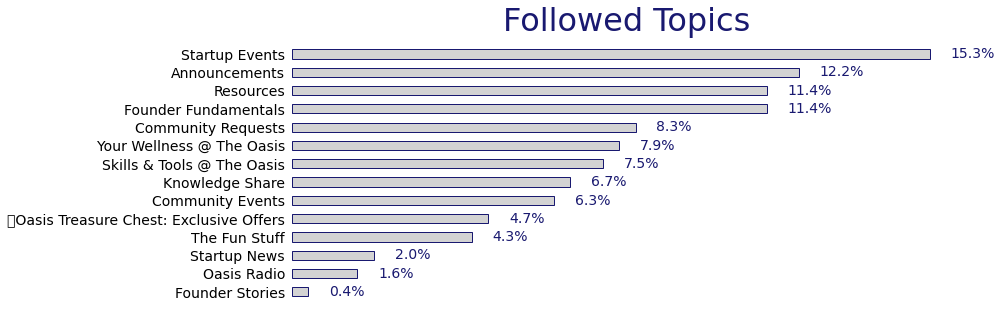

In [88]:
fig, ax = plt.subplots(figsize=(12, 5))

ax = plt.barh(topics['followed_topics'], 
              topics['%_total'],                                              
              color='lightgrey',
              edgecolor='midnightblue',
              height=0.5)

# Add annotation to bars
for p in ax.patches:
    width = p.get_width()    # get bar length
    plt.text(width + 0.5,       # set the text at 1 unit right of the bar
            p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
            '{:1.1f}%'.format(width), # set variable to display, 2 decimals
            ha = 'left',   # horizontal alignment
            va = 'center',
            fontsize=14, 
            color='midnightblue')     

plt.ylabel(None)
plt.title('Followed Topics', fontsize=32, color='midnightblue')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Hide the right and top spines
plt.box(False)

# Remove x ticks and labels
plt.tick_params(left = False, right = False , labelleft = True ,
                labelbottom = False, bottom = False)
plt.show()            

The most 4 popular topics are Startup Events, Announcements, Resources and Founders Fundamentals.

### SignIn Method

I would like to see how many users use different sign in methods.

In [89]:
# create new data for data frame with signups and number of users

# users with Facebook signup only
signed_with_facebook = network[(network['signed_in_with_facebook'] == True)
                              & (network['signed_in_with_linkedin'] == False)
                              & (network['signed_in_with_apple'] == False)
                              & (network['signed_in_with_password'] == False)]['member_id'].nunique()

# users with LinkedIn signup only
signed_with_LinkedIn = network[(network['signed_in_with_linkedin'] == True)
                              & (network['signed_in_with_facebook'] == False)
                              & (network['signed_in_with_apple'] == False)
                              & (network['signed_in_with_password'] == False)]['member_id'].nunique()

# users with Apple signup only
signed_with_apple = network[(network['signed_in_with_apple'] == True)
                           & (network['signed_in_with_facebook'] == False)
                           & (network['signed_in_with_linkedin'] == False)
                           & (network['signed_in_with_password'] == False)]['member_id'].nunique()

# users with Password signup only
signed_with_password = network[(network['signed_in_with_password'] == True)
                              & (network['signed_in_with_facebook'] == False)
                              & (network['signed_in_with_linkedin'] == False)
                              & (network['signed_in_with_apple'] == False)]['member_id'].nunique()
# users without signup
signed_without_signup = network[(network['signed_in_with_password'] == False)
                              & (network['signed_in_with_facebook'] == False)
                              & (network['signed_in_with_linkedin'] == False)
                              & (network['signed_in_with_apple'] == False)]['member_id'].nunique()

# users with signup combinations
signed_with_several_signups = (
    network['member_id'].nunique() 
    - signed_with_facebook 
    - signed_with_LinkedIn 
    - signed_with_apple 
    - signed_with_password 
    - signed_without_signup)

In [90]:
signed_without_signup_percent = (
    signed_without_signup/network['member_id'].nunique()
)

print(
    "{:.0f} members don't have any sign in."
    .format(signed_without_signup))
print(
    "It is {:.1%} of all members."
    .format(signed_without_signup_percent))

310 members don't have any sign in.
It is 26.9% of all members.


In [91]:
# create new data frame with signups and number of users
data_signins = [['Facebook', signed_with_facebook],
       ['LinkedIn', signed_with_LinkedIn],
       ['Apple', signed_with_apple],
       ['Password', signed_with_password],
       ['No signup', signed_without_signup] ,
       ['More than 1 signup', signed_with_several_signups]
       ]


data_signins = (pd.DataFrame(data_signins, 
                           columns = ['Sign In Type', 'Members Number'])
              .sort_values(by='Members Number', ascending=True)
              .set_index('Sign In Type')
        )
# add column with persentage
data_signins['%_total'] = round(((data_signins['Members Number']) / (data_signins['Members Number'].sum()))*100, 2)
data_signins

Members Number  %_total
Sign In Type                               
Apple                           12     1.04
More than 1 signup              14     1.22
Facebook                        23     2.00
No signup                      310    26.93
LinkedIn                       312    27.11
Password                       480    41.70

To visualize signups data, I used horizontal barplot chart from Matplotlib library. 

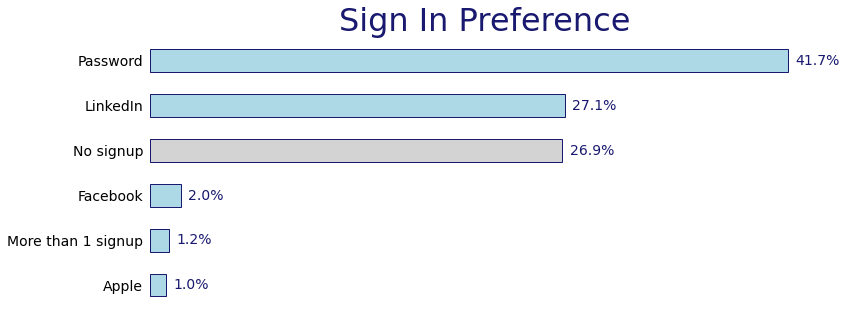

In [92]:
fig, ax = plt.subplots(figsize=(12, 5))

vals = data_signins.index
colors = ["lightgrey" if i == 'No signup' else "lightblue" for i in vals]

ax = plt.barh(data_signins.index, 
              data_signins['%_total'],                                              
              color=colors,
              edgecolor='midnightblue',
              height=0.5)

# Add annotation to bars
for p in ax.patches:
    width = p.get_width()    # get bar length
    plt.text(width + 0.5,       # set the text at 1 unit right of the bar
            p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
            '{:1.1f}%'.format(width), # set variable to display, 2 decimals
            ha = 'left',   # horizontal alignment
            va = 'center',
            fontsize=14, 
            color='midnightblue')     

plt.ylabel(None)
plt.title('Sign In Preference', fontsize=32, color='midnightblue')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Hide the right and top spines
plt.box(False)

# Remove x ticks and labels
plt.tick_params(left = False, right = False , labelleft = True ,
                labelbottom = False, bottom = False)
plt.show()            

Almost 42% of users used Sighup by Password, 27% - LinkedIn signup. 27% of users don't have signup type in data. There is no Google signup in data. About 1% of users use more than 1 signup method and about 1% used Apple signup.

### Apps

Next, I will check how many users used iOS and Android applications.

In [93]:
# create new data for data frame with apps and number of users

# users with only iOS app
has_iOS_app = network[(network['has_ios_app'] == True) & (network['has_android_app'] == False)]['member_id'].nunique()

# users with only Android app
has_Android_app = network[(network['has_android_app'] == True) & (network['has_ios_app'] == False)]['member_id'].nunique()

# users with both apps
both_apps = network[(network['has_ios_app'] == True) & (network['has_android_app'] == True)]['member_id'].nunique()

# users without apps
no_apps = network[(network['has_ios_app'] == False) & (network['has_android_app'] == False)]['member_id'].nunique()

In [94]:
# create new data frame with apps and number of users

data_apps = [['iOS', has_iOS_app], # users with only iOS app
             ['Android', has_Android_app], # users with only Android app
             ['Android and iOS', both_apps], # users with both apps
             ['No app', no_apps] # users without apps
       ]
data_apps = (pd.DataFrame(data_apps, 
                           columns = ['App', 'Members Number'])
              .sort_values(by='Members Number', ascending=True)
              .set_index('App')
        )

# add column with persentage
data_apps['%_total'] = round(((data_apps['Members Number']) / (data_apps['Members Number'].sum()))*100, 2)

data_apps

Members Number  %_total
App                                     
Android and iOS               2     0.17
Android                      58     5.04
iOS                         143    12.42
No app                      948    82.36

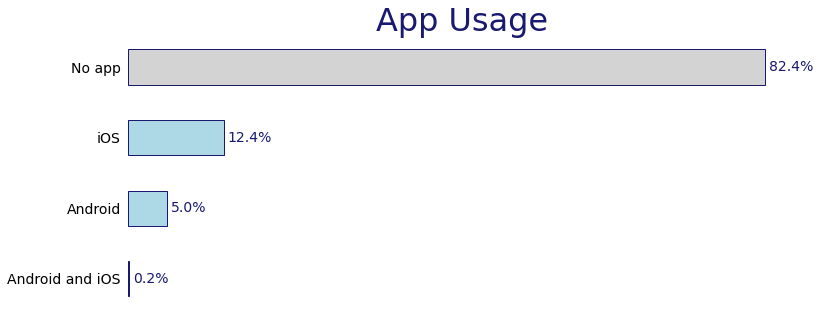

In [95]:
fig, ax = plt.subplots(figsize=(12, 5))

vals = data_apps.index
colors = ["lightgrey" if i == 'No app' else "lightblue" for i in vals]

ax = plt.barh(data_apps.index, data_apps['%_total'], 
              color=colors,
              edgecolor='midnightblue',
              height=0.5)

for p in ax.patches:
    width = p.get_width()    # get bar length
    plt.text(width + 0.5,       # set the text at 1 unit right of the bar
            p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
            '{:1.1f}%'.format(width), # set variable to display, 2 decimals
            ha = 'left',   
            va = 'center',
            fontsize=14, 
            color='midnightblue')     

       
plt.ylabel(None)
plt.title('App Usage', fontsize=32, color='midnightblue')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Hide the right and top spines
plt.box(False)

# Remove x ticks and labels
plt.tick_params(left = False, right = False , labelleft = True ,
                labelbottom = False, bottom = False)
plt.show()            

Most of users (almost 82%) didn't use application. Among members with application, most of them sed iOS app.

### Checklist completion

There is a column 'Welcome Checklist Completed'. I will find how many users completed this checklist.

In [96]:
checklist = network.pivot_table(index='welcome_checklist_completed', values = 'member_id', aggfunc='nunique').reset_index()
checklist = checklist.replace({False: 'Not completed', True: 'Completed'})
checklist

welcome_checklist_completed  member_id
0               Not completed       1141
1                   Completed         10

In [97]:
colors = ['lightblue', 'lightgrey']
fig_checklist = go.Figure(
    data=[go.Pie(labels=checklist['welcome_checklist_completed'], 
                 values=checklist['member_id'], 
                 texttemplate='%{percent:0.1%}',
                
                 hole=0.6)])

fig_checklist.update_layout(title_text='Welcome Checklist', 
                            font_size=20, 
                            title_x=0.5,
                            uniformtext_minsize=15, 
                            uniformtext_mode='hide',
                            title_font_color="midnightblue",
                            title_font_size=32,
                            legend=dict(font=dict(size=15)),
                            width=800, 
                            height=400,
                            )

fig_checklist.update_traces(marker=dict(colors=colors, line=dict(color='#000000', width=1)))
fig_checklist.show()

99% of members didn't complete Welcome Checklist.

### Join Date

In [98]:
# extract dates from the timestamns in columns 'Join Date' and 'Last Visited Network'

network['join_day'] = network['join_date'].dt.date
network['last_visited_day'] = network['last_visited_network'].dt.date # to use later

In [99]:
network['join_month_year'] = pd.to_datetime(network['join_date']).dt.to_period('M')
network['last_visit_month_year'] = pd.to_datetime(network['last_visited_network']).dt.to_period('M') # to use later

In [100]:
join_data = network.pivot_table(index='join_month_year', values='member_id', aggfunc='nunique').reset_index()
join_data.head()

join_month_year  member_id
0         2020-09          1
1         2020-10         84
2         2020-11         83
3         2020-12         27
4         2021-01         96

In [101]:
mean_number_joined = round(join_data['member_id'].mean(),1)
mean_number_joined

44.3

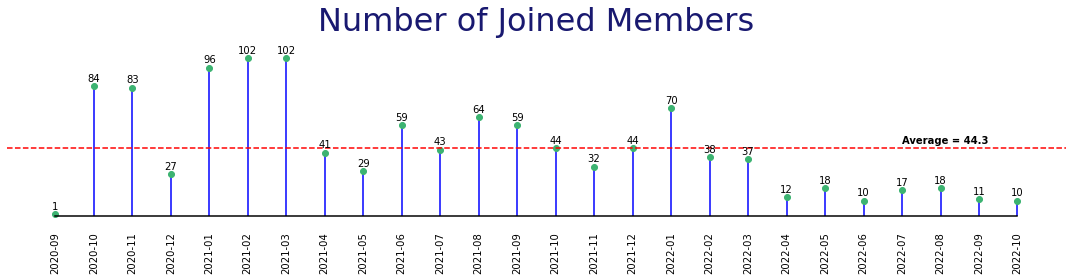

In [102]:
fig, ax = plt.subplots(figsize=(15, 4),sharex=True)

# plot the chart for the Join data 
(markerline, stemlines, baseline)=ax.stem(join_data['join_month_year'].astype(str), 
           join_data['member_id'], 
           linefmt='blue',
           label = 'join_month_year',
           #markerfmt = "D",
           basefmt = "black")



markerline.set_color("mediumseagreen" )
ax.set_title('Number of Joined Members', fontsize=32, color='midnightblue', pad=20)

#add annotation to bars
for x,y in zip(join_data['join_month_year'].astype(str), join_data['member_id'], ):
    ax.annotate('{:.0f}'.format(y), xy=(x,y), xytext=(0,5), textcoords='offset points',ha='center')

#remove frame from the top subplot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.xticks(rotation = 90)

# Hide the right and top spines
plt.box(False)

# Remove x ticks and labels
ax.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = True, bottom = False, rotation = 90)

# add average lines
plt.axhline(mean_number_joined, color='r', ls='--')
# add text annotation to average lines
plt.text(22, mean_number_joined+3, "Average = {:.1f}".format(mean_number_joined), 
         horizontalalignment='left', 
         size='medium', 
         color='black', 
         weight='semibold')

plt.tight_layout()

plt.show()

In average, about 44 members joins Network every month. The biggest number of new members joined in October – November 2020 and January – March 2021. The umber of new members decreased to below average after March 2022 and never get back to previous levels. 

### Last Visit

In [103]:
last_visit_data = network.pivot_table(index='last_visit_month_year', values='member_id', aggfunc='nunique').reset_index()
last_visit_data.head()

last_visit_month_year  member_id
0               2020-10         32
1               2020-11         60
2               2020-12         22
3               2021-01         56
4               2021-02         68

In [104]:
mean_number_last_visit = round(last_visit_data['member_id'].mean(),1)
mean_number_last_visit

46.0

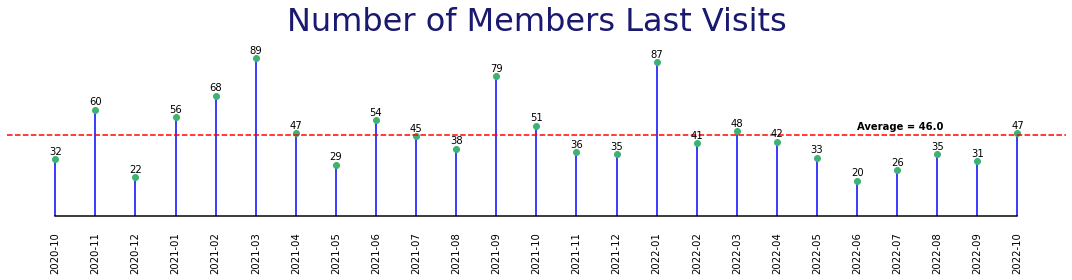

In [105]:
fig, ax = plt.subplots(figsize=(15, 4),sharex=True)

# plot the chart for the Last Visits data 
(markerline, stemlines, baseline)=ax.stem(last_visit_data['last_visit_month_year'].astype(str), 
           last_visit_data['member_id'], 
           linefmt='blue',
           label = 'last_visit_month_year',
           #markerfmt = "D",
           basefmt = "black")
markerline.set_color("mediumseagreen" )
ax.set_title('Number of Members Last Visits', fontsize=32, color='midnightblue', pad=20)

#add annotation to bars
for x,y in zip(last_visit_data['last_visit_month_year'].astype(str), last_visit_data['member_id'], ):
    ax.annotate('{:.0f}'.format(y), xy=(x,y), xytext=(0,5), textcoords='offset points',ha='center')

#remove frame from the top subplot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.xticks(rotation = 90)

# Hide the right and top spines
plt.box(False)

# Remove x ticks and labels
ax.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = True, bottom = False, rotation = 90)

# add average lines
plt.axhline(mean_number_last_visit, color='r', ls='--')
# add text annotation to average lines
plt.text(20, mean_number_last_visit+3, "Average = {:.1f}".format(mean_number_last_visit), 
         horizontalalignment='left', 
         size='medium', 
         color='black', 
         weight='semibold')

plt.tight_layout()

plt.show()

The number of average visits fluctuated about an average of 46 people: from 22 to 89 people. During September and November 2022, 31 and 47 members stayed active accordingly.

### Number of Days Before Last Visit

In [106]:
network['days_active'] = network['last_visited_day'] - network['join_day']
network['days_active'] = network['days_active'].dt.days

In [107]:
days_active = pd.DataFrame(network.groupby('member_id')['days_active'].first())
days_active.head()

days_active
member_id             
4829869            776
5057122            752
5058097            479
5079630            750
5223835            652

In [108]:
print('Average number of active days is', 
      round(days_active['days_active'].mean(),2))

Average number of active days is 80.43


In [109]:
days_active['days_active'].describe()

count    1151.000000
mean       80.433536
std       144.141581
min         0.000000
25%         0.000000
50%        10.000000
75%        90.000000
max       776.000000
Name: days_active, dtype: float64

### Cohort Analysis

Next, I will do cohort analysis to find out how many users stay active over time  comparing to the initial join month.

In [110]:
# how many members stay active by months

cohorts = (
    network.groupby(['join_month_year', 'last_visit_month_year'])
    .agg({'member_id': 'nunique'})
    .reset_index()
) 

cohorts.head()

join_month_year last_visit_month_year  member_id
0         2020-09               2022-10          1
1         2020-10               2020-10         32
2         2020-10               2020-11          8
3         2020-10               2020-12          4
4         2020-10               2021-01          4

In [111]:
# how many users were initially joined by months

initial_cohort_users = cohorts.groupby('join_month_year').agg(
    {'last_visit_month_year': 'first', 'member_id': 'sum'}).reset_index()

initial_cohort_users = initial_cohort_users.rename(
    columns={'member_id': 'cohort_size'})
initial_cohort_users.head()

join_month_year last_visit_month_year  cohort_size
0         2020-09               2022-10            1
1         2020-10               2020-10           84
2         2020-11               2020-11           83
3         2020-12               2020-12           27
4         2021-01               2021-01           96

In [112]:
# combine both tables

cohorts = cohorts.merge(initial_cohort_users[['join_month_year', 'cohort_size']], on = 'join_month_year')
cohorts.head()

join_month_year last_visit_month_year  member_id  cohort_size
0         2020-09               2022-10          1            1
1         2020-10               2020-10         32           84
2         2020-10               2020-11          8           84
3         2020-10               2020-12          4           84
4         2020-10               2021-01          4           84

In [113]:
# add column retention

cohorts['retention'] = cohorts['member_id'] / cohorts['cohort_size'] 
cohorts.head()

join_month_year last_visit_month_year  member_id  cohort_size  retention
0         2020-09               2022-10          1            1   1.000000
1         2020-10               2020-10         32           84   0.380952
2         2020-10               2020-11          8           84   0.095238
3         2020-10               2020-12          4           84   0.047619
4         2020-10               2021-01          4           84   0.047619

In [114]:
# create table to find how many members stay active over time

retention = cohorts.pivot_table(
    index=cohorts['join_month_year'],
    columns='last_visit_month_year',
    values='retention',
    aggfunc='sum'
)

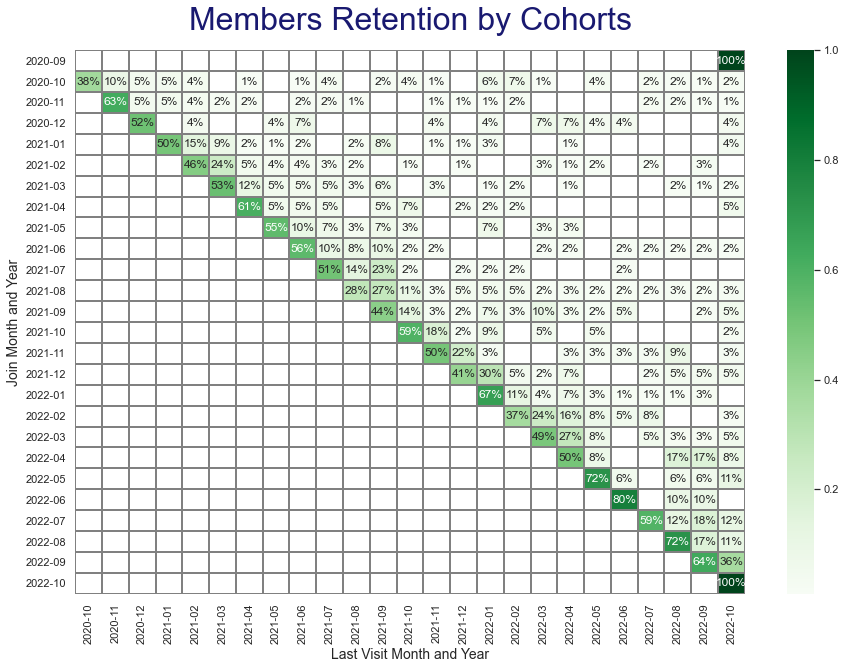

In [115]:
# create heatmap to visualize members retention

sns.set(style='white')
plt.figure(figsize=(15, 10))
sns.heatmap(
    retention, 
    annot=True, 
    fmt='.0%', 
    linewidths=1, 
    linecolor='gray', 
    annot_kws={"size": 12},
    cmap = 'Greens'
) 
plt.ylabel('Join Month and Year', fontsize=14)
plt.xlabel('Last Visit Month and Year', fontsize=14)
plt.title('Members Retention by Cohorts', fontsize=32, color='midnightblue', pad=20)
plt.show()

Cohort analysis shows that about 40-80% of joined users don’t visit network after initial month, 5-20% don’t visit network after 2 months of joining, and about 2-4% continue to visit network.

### Short Bio Analysis

In [116]:
# create data frame of users who provided short bio

short_bio = network[
    (network['short_bio']!='Not provided') 
    & (network['network_role'] =="contributor")].drop_duplicates(subset=['member_id']) 

In [117]:
print('{:.1%} of users filled short bio about themselve.'
      .format(round((short_bio['member_id'].nunique()
       /network['member_id'].nunique()),4)))

15.0% of users filled short bio about themselve.


In [118]:
"{:.1%} of members don't have any program membership.".format(no_program_membership)

"88.6% of members don't have any program membership."

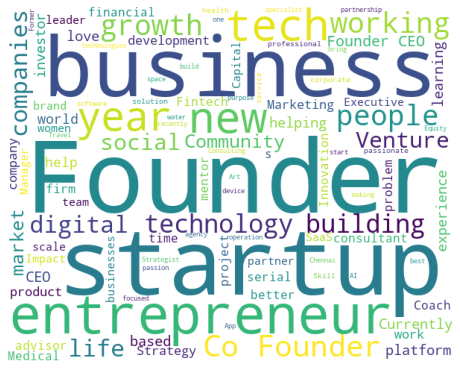

In [119]:
# create word cloud for Short Bio column

short_bio_text = ' '.join(short_bio.drop_duplicates(subset=['short_bio'])['short_bio'].tolist())
stopwords = set(STOPWORDS)
def generate_basic_wordcloud(data):
    cloud = WordCloud(width=600,
                      height=480,
                      max_words=100,
                      background_color='white',
                      stopwords= stopwords,
                      collocations=True).generate_from_text(data)
    plt.figure(figsize=(8,8))
    plt.imshow(cloud)
    plt.axis('off')
    plt.show()

generate_basic_wordcloud(short_bio_text)

Short bio was reported by about 15% of users. Most popular words there were: founder, startup, business. 

### Referrals

In [120]:
referrals = network.pivot_table(index=['member_id', 'network_role'], 
                                values='members_referred', 
                                aggfunc='first').sort_values(by='members_referred',
                                                            ascending=False).query('members_referred >0')
referrals.columns = ['number_members_referred']
referrals = referrals.reset_index()
referrals.head()

member_id network_role  number_members_referred
0    4829869         host                      308
1    5057122         host                      143
2    5686940    moderator                        7
3    5079630         host                        6
4    7824638  contributor                        5

In [121]:
referrals_pivot = referrals.pivot_table(index='network_role', 
                                        values='number_members_referred',
                                       aggfunc='sum')
referrals_pivot

number_members_referred
network_role                         
contributor                        39
host                              458
moderator                          13

In [122]:
print(referrals_pivot['number_members_referred'].sum(),
      'members were referred by other members.')

510 members were referred by other members.


In [123]:
no_referral = (network['member_id'].nunique()
      - referrals_pivot['number_members_referred'].sum())
print(no_referral,
      'members were not referred.')


641 members were not referred.


In [124]:
print('{:.1%} of users joined the network without referral.'
      .format(round(no_referral/network['member_id'].nunique(),4)))

55.7% of users joined the network without referral.


55.7% of users joined the network without referral. Most referred members were referred by Jason. 39 members were referred by other members (not hosts or moderators). Referred members on average spend more days in the network (91 days vs 72 days) and use applications more often (117 vs 86). On the other hand, members without referral have more subscription plans (9 vs 3) and follow more topics (41 vs 28).

### Save data for the dashboard

In [125]:
network.to_csv('network_for_dashboard.csv')

### Analysis of the second sheet of data

The second sheet has the limited data: 41 users.

In [126]:
# to add id to members, I set index column as IDs

profile_questions = profile_questions.reset_index()

In [127]:
profile_questions.head(3)

index          date_requested    status                question_1  \
0      0 2022-07-22 05:52:43.831  rejected  Why do you want to join?   
1      1 2022-07-22 06:57:21.059  rejected  Why do you want to join?   
2      2 2022-07-22 09:19:04.299  rejected  Why do you want to join?   

                         answer_1  
0  For preparation and knowledge   
1                  for konowledge  
2                      FORUM POST

In [128]:
profile_questions['day_requested'] = profile_questions['date_requested'].dt.date

In [129]:
print(
    'Members requested to join network between', profile_questions['day_requested'].min(), 'and', profile_questions['day_requested'].max())

Members requested to join network between 2022-07-22 and 2022-10-26


In [130]:
status_count = value_counts_perc_pivot(profile_questions, 'status', 'index')
status_count

status  index  %_total
0  approved     26    63.41
1  rejected     15    36.59

Almost 37% of requests to join network between 2022-07-22 and 2022-10-26 were rejected.

I would like to create word clouds for answers to question 1 for approved and rerected users.

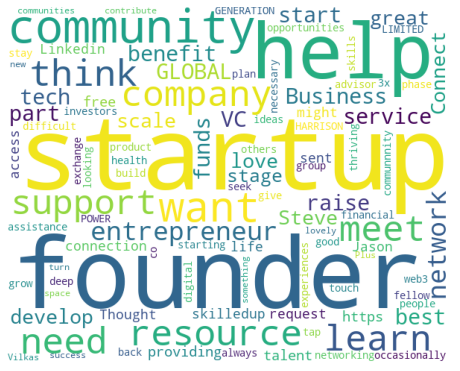

In [131]:
# create word cloud for approved users

short_bio_text_approved = ' '.join(profile_questions[profile_questions['status']=='approved'].drop_duplicates(subset=['answer_1'])['answer_1'].tolist())
stopwords = set(STOPWORDS)
def generate_basic_wordcloud(data):
    cloud = WordCloud(width=600,
                      height=480,
                      max_words=100,
                      background_color='white',
                      stopwords= stopwords,
                      collocations=True).generate_from_text(data)
    plt.figure(figsize=(8,8))
    plt.imshow(cloud)
    plt.axis('off')
    plt.show()

generate_basic_wordcloud(short_bio_text_approved)

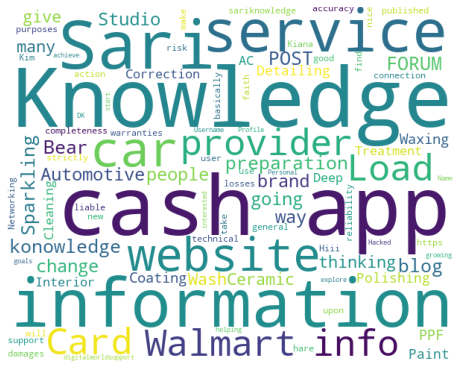

In [132]:
# create word cloud for rejected users



short_bio_text_rejected = ' '.join(profile_questions[profile_questions['status']=='rejected'].drop_duplicates(subset=['answer_1'])['answer_1'].tolist())
stopwords = set(STOPWORDS)
def generate_basic_wordcloud(data):
    cloud = WordCloud(width=600,
                      height=480,
                      max_words=100,
                      background_color='white',
                      stopwords= stopwords,
                      collocations=True).generate_from_text(data)
    plt.figure(figsize=(8,8))
    plt.imshow(cloud)
    plt.axis('off')
    plt.show()

generate_basic_wordcloud(short_bio_text_rejected)

Word clouds shows that most popular words in answers of approved members are startup, founder, help, community. 
Most popular words in answers of rejected members are knowledge, cash, app.

# Conclusions<a id='conclusions'></a>

**GEOGRAPHY AND DETAILS ABOUT USERS**

Data contains information about 1151 network members from 66 countries who joined the network between 2020-09-10 and 2022-10-25. Most members are from the United States. 56% of all members are from Massachusetts, California, and New York.
Top 5 countries by number of members are USA, India, Canada, UK, and Nigeria.
About 20% of users reported their category. Most of reported users were founders or co-founders. 
Short bio was reported by about 15% of users. Most popular words there were: founder, startup, business. Less that 1% completed welcome checklist.

**TRENDS**

In average, about 44 members joins Network every month. The biggest number of new members joined in October – November 2020 and January – March 2021. The number of new members decreased to below average after March 2022 and never get back to previous levels. 
The number of average visits fluctuated about an average of 46 people: from 22 to 89 people. During September and November 2022, 31 and 47 members stayed active accordingly.
Cohort analysis shows that about 40-80% of joined users don’t visit network after initial month, 5-20% don’t visit network after 2 months of joining, and about 2-4% continue to visit network.

**MEMBERSHIPS**

There are 2 kinds of The Network memberships: program and group. Group memberships are more popular than program membership. 15% of members have group membership while about 11% have program membership.
The most popular group membership is “Boston New Technology” - 42% of members who have group membership (99 people) have it.
The most popular program membership is “Skills + Tools presented by The Network” - 55% of members who have program membership (55 people) have it. Most popular membership among reported founders/co-founders is “Your Wellness presented by The Network” (16 founders).

**TOPICS**

About 6% of members followed The Network topics. The 4 most popular topics are Startup Events, Announcements, Resources, and Founder Fundamentals.

**SIGN INS, APPS, WELCOME CHECKLIST**

For some reason, about 27% of users don’t have sign in. There is no sign in by Google in the data. Sign in by password is the most popular sign in method.  42% of users used sign in by password, 27% - LinkedIn signup. About 1% of users use more than 1 signup method and about 1% used Apple signup.
Most users (almost 82%) didn't use application. Among members with application, most of them have iOS application.
More than 99% of members didn't complete Welcome Checklist.

**REFERRALS**

55.7% of users joined the network without referral. Most referred members were referred by Jason. 39 members were referred by other members (not hosts or moderators). Referred members on average spend more days in the network (91 days vs 72 days) and use applications more often (117 vs 86). On the other hand, members without referral have more subscription plans (9 vs 3) and follow more topics (41 vs 28).


# Suggestions<a id='suggestions'></a>

1. Standardize the member category for easier analysis in future.

2. Network has several subscription plans, membership options, and topics to follow with little members’ interest. I recommend trying to find out the reason of little interest. Does these options reply to members’ needs?

3. Members on average stay active less than 3 months. I would research why they won't stay active.

4. Why users don't complete the Welcome checklist? May be too long? What is the goal of the Welcome checklist? 

5. Some members referred other members. If it is useful, I would do a referral program encouraging members to refer.


# Link to Dashboard<a id='dashboard'></a>

https://public.tableau.com/views/StartupsNetworkDashboard/Story1?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link

Dashboard has a filter on the top. Each dashboard page can be adjusted by Country name, Member category, Network role, Date, Referral type, Ambassador level. Also, to anonymize data, I removed all names and emails. If it is needed in the future, I can adjust the data and the dashboard.

In [133]:
%%html
<div class='tableauPlaceholder' id='viz1672190751651' style='position: relative'><noscript><a href='#'><img alt='MEMBERS DASHBOARD ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;St&#47;StartupsNetworkDashboard&#47;Story1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='StartupsNetworkDashboard&#47;Story1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;St&#47;StartupsNetworkDashboard&#47;Story1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1672190751651');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='1016px';vizElement.style.height='991px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>